# Introduction to neural network classification with Tensorflow

In this notebook we're going to learn how to write neural networks for classificarion problems.

A few Classification problems
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
     

In [2]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

Our data is a little hard to understand right now soo let's visualize it!

In [4]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


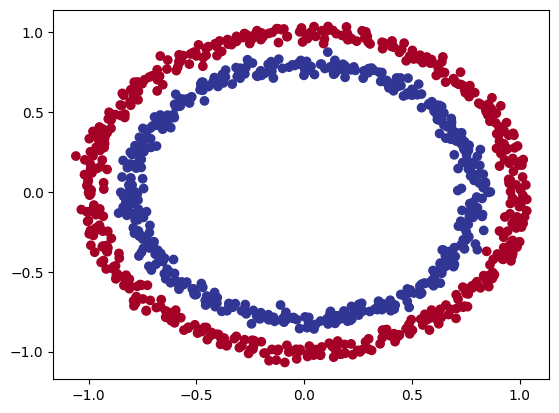

In [5]:
# Visualize with a plot 
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

## Input and Output Shapes

In [6]:
# Check the shape of our features and labels
X.shape,y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(X),len(y)

(1000, 1000)

In [8]:
# view the first example of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

The steps in modelling with TensorFlow are typically:

1. Create or import the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [9]:
import tensorflow as tf

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.5110 - loss: 2.8735 
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.5159 - loss: 0.1974
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.5173 - loss: 0.1759
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.5172 - loss: 0.1734
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.5102 - loss: 0.1734


In [11]:
# let's try and improve our model by trainig for longer
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.4856 - loss: 0.1732


[0.1733737587928772, 0.47200000286102295]

Since we're working on a binary classification problem and our model is getting around ~48% accuracy its performing as if it's guessing 

So let's step thing sup a notch and add an extra layer

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model this time with 2 layers 
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])  

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X,y,epochs=200)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.4672 - loss: 3.0662 
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - accuracy: 0.4719 - loss: 0.7089
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.4659 - loss: 0.7003
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.4557 - loss: 0.6971
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.4534 - loss: 0.6956
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.4424 - loss: 0.6950
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.4288 - loss: 0.6946
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.4346 - loss: 0.6945
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.4356 - loss: 0.6944
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.4394 - loss: 0.6943
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.4453 - loss: 0.6943
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 

In [13]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.4769 - loss: 0.6929


[0.6931768655776978, 0.47999998927116394]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model-we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization funtion such as Adam instead of SGD.
3. Fitting the model - perhaps we might fit our model for more epochs(leave it for training for some time)

In [14]:
# Setting up the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

# 3. Fiting the model
model_3.fit(X,y,epochs=200)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - accuracy: 0.4626 - loss: 4.1210 
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.4675 - loss: 0.7542
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.4526 - loss: 0.7015
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.4677 - loss: 0.6968
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.4270 - loss: 0.6955
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.4386 - loss: 0.6956
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.4444 - loss: 0.6958
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.4418 - loss: 0.6960
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.4443 - loss: 0.6962
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.4428 - loss: 0.6964
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.4443 - loss: 0.6966
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 

In [15]:
# 4. Evaluate the model
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.5023 - loss: 0.6918


[0.6945355534553528, 0.48399999737739563]

In [16]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,965 (15.49 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,644 (10.33 KB)

In [17]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_4 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_4.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - accuracy: 0.4824 - loss: 4.0510 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.4830 - loss: 0.8165
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.4830 - loss: 0.7553
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.4830 - loss: 0.7306
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.4830 - loss: 0.7140
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.4830 - loss: 0.7040
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.4830 - loss: 0.6987
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.4830 - loss: 0.6961
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.4805 - loss: 0.6949
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.4174 - loss: 0.6944
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.4358 - loss: 0.6942
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 

In [18]:
model_4.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.5137 - loss: 0.6918


[0.6940041184425354, 0.492000013589859]

In [19]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,965 (15.49 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,644 (10.33 KB)

In [20]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,965 (15.49 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,644 (10.33 KB)

To visulaoze our model's function let's create a function `plot_decision_boundary()` , this function will :
* Take in a trained model,features(X) and labels(Y)
* Create a meshgrid of the different X values
* Male predictions across the meshgrid
* Plot the predictions as well as a line between zones(where each unique class fails)

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def plot_decision_boundary(model, X, y):
    """Plots the decision boundary created by a model predicting on X"""
    
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X values (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]  # stack the 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")        
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step
Doing binary classification


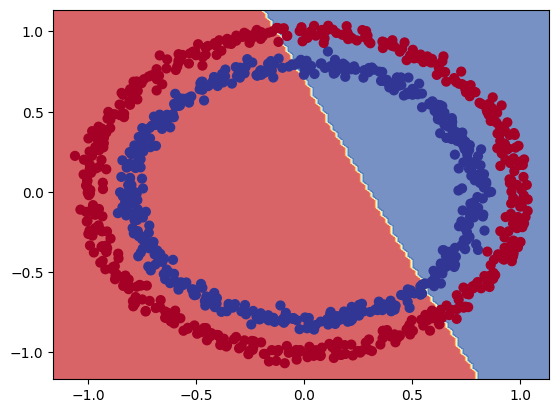

In [23]:
# Check out the predictions of our model is making
plot_decision_boundary(model=model_4,X=X,y=y)

In [24]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

In [26]:
# Fit our model to the regression data
model_4.fit(X_reg_train,y_reg_train,epochs=100)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_3_1/Cast:0", shape=(None,), dtype=float32). Expected shape (None, 2), but input has incompatible shape (None,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None,), dtype=int32)
  • training=True
  • mask=None

Oh wait we have compiled our model for a binary classification problem.

But we're now working on a regression problem let's change the model to suit our data

In [27]:
X_reg_train = tf.reshape(X_reg_train, (-1, 1))
Y_reg_train = tf.reshape(y_reg_train, (-1, 1))
X_reg_test = tf.reshape(X_reg_test, (-1, 1))
Y_reg_test = tf.reshape(y_reg_test, (-1, 1))



In [28]:
tf.random.set_seed(42)

# 1. Creating our model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),  
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


# 2.Compile our model this time with a regression specific loss function
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_5.fit(X_reg_train,y_reg_train,epochs=100)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 378.7511 - mae: 379.6513  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 259.9581 - mae: 260.9639 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 138.0828 - mae: 139.2118 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46.2293 - mae: 45.7339 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 80.3215 - mae: 80.2070 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 69.9124 - mae: 70.1491 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 44.2295 - mae: 44.1844 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 48.6623 - mae: 48.8142 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40.3388 - mae: 40.2575 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43.5748 - mae: 43.5762 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 40.3087 - mae: 40.3183
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40.9544 - mae: 40.9842 
Epoch 13/100
5/5 

In [29]:
print(f"X_reg_train shape: {X_reg_train.shape}")


X_reg_train shape: (150, 1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
X_reg_test shape: (50, 1)
Y_reg_test shape: (50,)
Y_reg_preds shape: (50,)


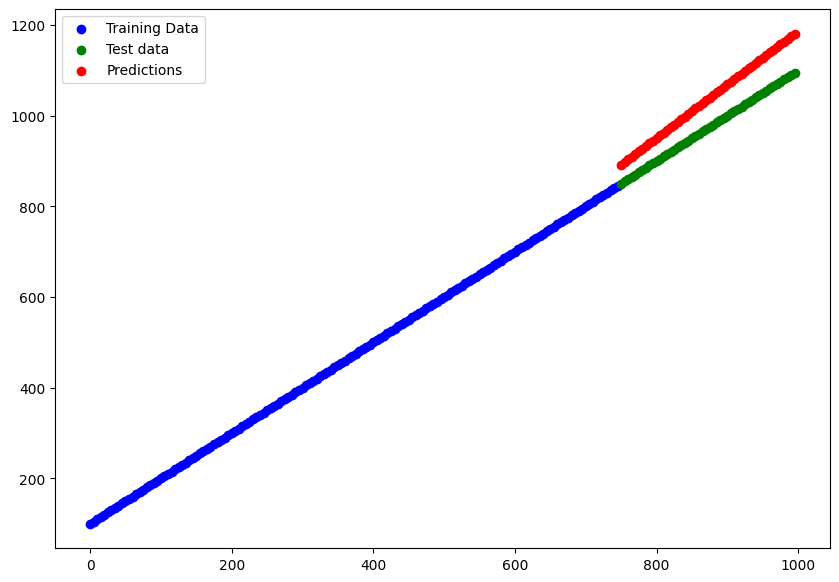

In [30]:
# Fix the length of Y_reg_test to match X_reg_test
Y_reg_test = Y_reg_test[:50]

# Make predictions with our trained model
Y_reg_preds = model_5.predict(X_reg_test)

# Ensure Y_reg_preds has the correct shape
Y_reg_preds = Y_reg_preds.flatten()

# Check shapes for confirmation
print(f"X_reg_test shape: {X_reg_test.shape}")
print(f"Y_reg_test shape: {y_reg_test.shape}")
print(f"Y_reg_preds shape: {Y_reg_preds.shape}")

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, Y_reg_preds, c="r", label="Predictions")
plt.legend()
plt.show()


### The Missing Piece: Non-linearity

In [31]:
# Set the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="linear")
])

# 2. Compiling the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history=model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.4584 - loss: 6.7736 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.4559 - loss: 6.7692
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.4571 - loss: 6.7671
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.4571 - loss: 6.7656
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.4571 - loss: 6.7606
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.4556 - loss: 6.7445
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.4569 - loss: 6.7174
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.4569 - loss: 6.7151
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.4579 - loss: 6.6837
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.4603 - loss: 6.6800
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.4603 - loss: 6.6792
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 

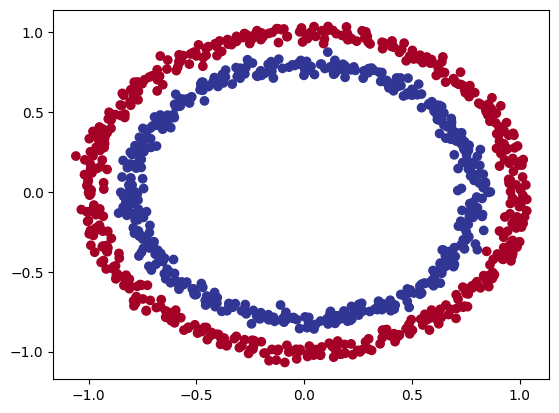

In [32]:
# Check out our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
Doing binary classification


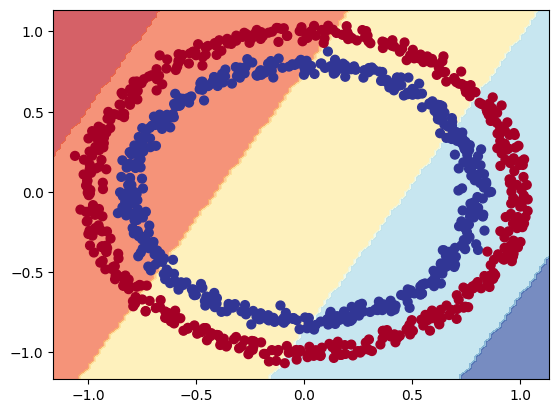

In [33]:
# Check the decision boundaryfor our latest model
plot_decision_boundary(model=model_6,X=X,y=y)

Let's try to build our first neural network with a non-linear activation function

In [34]:
# Set the random set
tf.random.set_seed(42)

# 1. Create the Model
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="relu"),
    tf.keras.layers.dense(1)
    ])

# 2.Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
                metrics=['accuracy'])

#3. Fitting the model
model_7.fit(X,y,epochs=100)

AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'dense'

In [ ]:
plot_decision_boundary(model=model_7,X=X,y=y)

NameError: name 'model_7' is not defined

In [ ]:
# Time to replicate the mutli-layer neural network from Tensorflow Playground

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fitting the model
history=model_8.fit(X,y,epochs=250)

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4830 - loss: 8.3336   
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4830 - loss: 8.3336 
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4830 - loss: 8.3336 
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4830 - loss: 8.3336 
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4830 - loss: 8.3336 
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8

In [ ]:
# Evaluate the model
model_8.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.4955 - loss: 8.1264


[7.96460485458374, 0.5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step
Doing binary classification


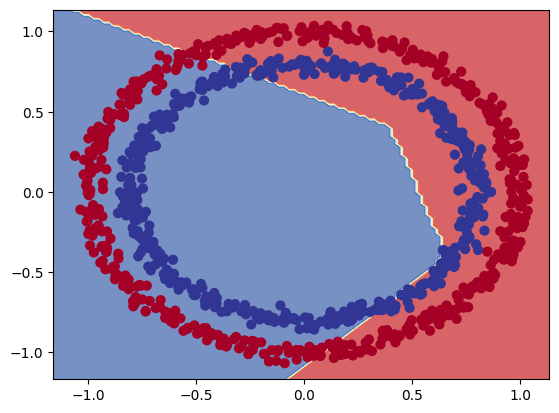

In [ ]:
# How do our model predictions look
plot_decision_boundary(model_8,X,y)

In [ ]:
#  Set the random seed
tf.random.set_seed(42)

# 1 Create the model
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2.Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
                metrics=['accuracy'])

# 3.Fit the model
history=model_9.fit(X,y,epochs=300)

Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - accuracy: 0.5191 - loss: 0.6973 
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.5223 - loss: 0.6961
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.5095 - loss: 0.6956
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.4989 - loss: 0.6953
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.5202 - loss: 0.6950
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.5172 - loss: 0.6949
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.5117 - loss: 0.6948
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.5008 - loss: 0.6948
Epoch 9/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.5025 - loss: 0.6948
Epoch 10/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - accuracy: 0.4905 - loss: 0.6947
Epoch 11/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.4854 - loss: 0.6947
Epoch 12/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Evaluate the model
model_9.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.8414 - loss: 0.3827


[0.3808118999004364, 0.8450000286102295]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step
Doing binary classification


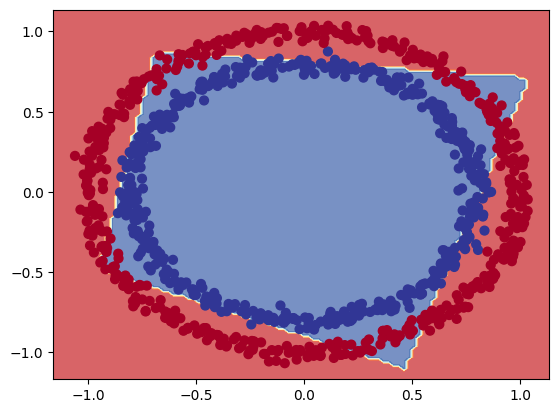

In [ ]:
# let's visualize our incredible metrics
plot_decision_boundary(model_9,X,y)

**NOTE** : 
* The thing we are doing here is wrong because we are training the model on the same data that we are testing and evaluating on this might lead to over or under fitting the future

* The combination of linear and non linear functions is one of the key fundamentals of the neural networks

In [ ]:
# Create a toy tensor (similar to the data that we pass into our models)
A=tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [35]:
# Visualize our toy tensor
plt.plot(A)

NameError: name 'A' is not defined

In [36]:
# Let's start by replecating sigmoid-sigmoid(x)=1/(1+exp(-x))
def sigmoid(x):
    return 1/(1+tf.exp(-x))

# use the sigmoid function on our toy tensor
sigmoid(A)

NameError: name 'A' is not defined

In [37]:
# Now plot the sigmoid function
plt.plot(sigmoid(A))

NameError: name 'A' is not defined

In [38]:
def relu(x):
    return tf.maximum(0,x)

# Now lets pass our toy tensor to our custom relu fucntion
relu(A)

NameError: name 'A' is not defined

In [39]:
# Let's plot the relu values of the toy tensor
plt.plot(relu(A))

NameError: name 'A' is not defined

In [40]:
# Let's try the linear activation fucntion
def linear(x):
    return x

# Now lets pass our toy tensor into our custom linear activation function
linear(A)

NameError: name 'A' is not defined

In [41]:
# Does the linear activation fucntion does anything
plt.plot(tf.keras.activations.linear(A))

NameError: name 'A' is not defined

### Evaluating and improving our classification

So far we've been training and testing on the same dataset 
.However,in machine learning this is a sin.
So let's create a training and test dataset

In [42]:
# Check how many examples we have
len(X)

1000

In [43]:
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [44]:
X_train,y_train=X[:800],y[:800]
X_test,y_test=X[800:],y[800:]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [45]:
# Let's recreate a model to fit on the trianing data and evaluate on the testing data

#Set the random seed
tf.random.set_seed(42)


# 1.Create the model
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. Compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=["accuracy"])

# 3. Fit the model
history=model_10.fit(X_train,y_train,epochs=200)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5179 - loss: 0.6865   
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.5830 - loss: 0.6807
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.5952 - loss: 0.6716
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.6082 - loss: 0.6620
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.6326 - loss: 0.6461
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.6610 - loss: 0.6225
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.7226 - loss: 0.5834
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.7663 - loss: 0.5378
Epoch 9/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7878 - loss: 0.4919 
Epoch 10/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.8101 - loss: 0.4544
Epoch 11/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.8258 - loss: 0.4244
Epoch 12/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0

In [46]:
model_10.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9981 - loss: 0.0113 


[0.022867649793624878, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step
Doing binary classification


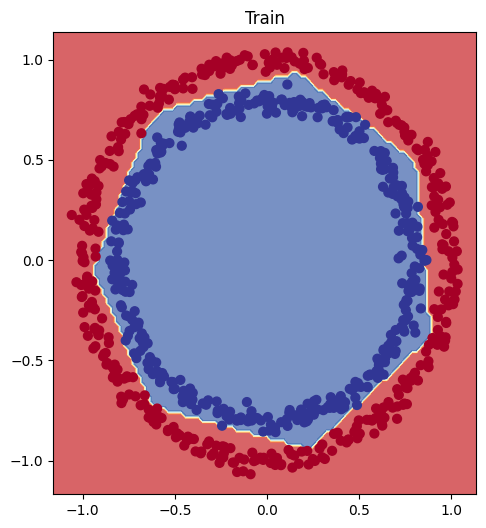

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step
Doing binary classification


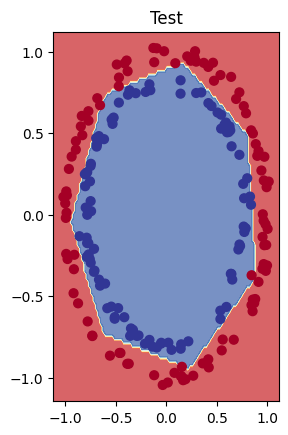

In [47]:
# Plot the descision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(model_10,X=X_test,y=y_test)
plt.show()

### Plotting the loss curves

In [48]:
# Convert the history object into a dataFrame
pd.DataFrame(history.history)

,accuracy,loss
0,0.54125,0.687465
1,0.57375,0.680495
2,0.59000,0.672877
3,0.60875,0.661679
4,0.65750,0.644454
...,...,...
195,0.98750,0.027576
196,0.98500,0.028159
197,0.98500,0.028610
198,0.98500,0.029051


Text(0.5, 1.0, 'Model 10 loss curve')

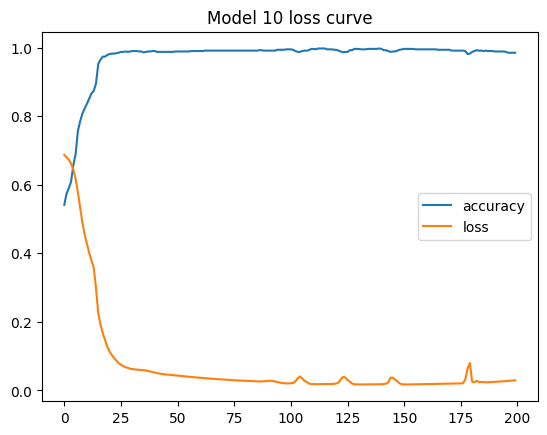

In [49]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model 10 loss curve")

**NOTE:** For many problems,the loss function going down means the model is improving(the predictions it's makiing are getting ground truth labels).

### Finding the best learning rate
TO find the ideal learning rate (the learning rate where the loss decreases the most in the training)we're gping to use the following steps:
* A learing rate **callback** - you can think of a callback as an extra piece of funtionality , you can add to your *while* its tarining.
* Another model(we could use the same one as above,but we're practicing building models here)
* A modified loss curves plot. 

In [50]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_11.compile(loss="binary_crossentropy",
                 optimizer="Adam",
                 metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

# Fit the model
history_11=model_11.fit(X_train,y_train,epochs=150,callbacks=[lr_scheduler])

Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step - accuracy: 0.5006 - loss: 0.7030 - learning_rate: 1.0000e-04
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.4991 - loss: 0.7026 - learning_rate: 1.1220e-04
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.4875 - loss: 0.7022 - learning_rate: 1.2589e-04
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.5168 - loss: 0.7018 - learning_rate: 1.4125e-04
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.5187 - loss: 0.7013 - learning_rate: 1.5849e-04
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.5183 - loss: 0.7008 - learning_rate: 1.7783e-04
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5082 - loss: 0.7004 - learning_rate: 1.9953e-04
Epoch 8/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5037 - loss: 0.6999 - learning_rate: 2.2387e-04
Epoch 9/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5064 - loss: 0.6995

<Axes: xlabel='epochs'>

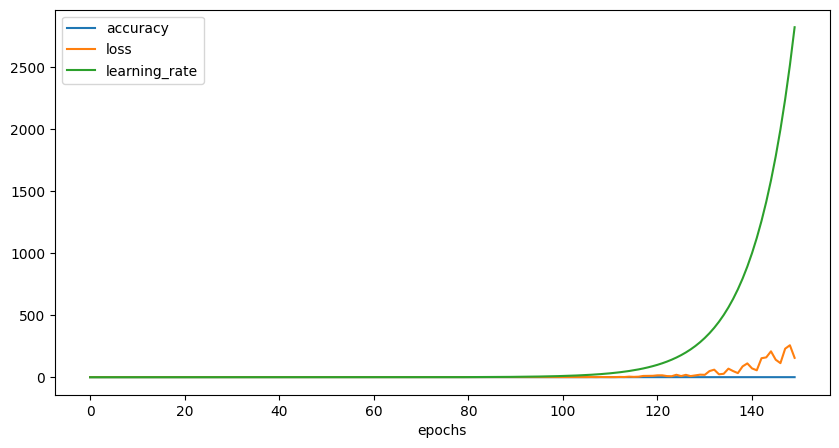

In [51]:
#Checkout the history
pd.DataFrame(history_11.history).plot(figsize=(10,5),xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate VS Loss')

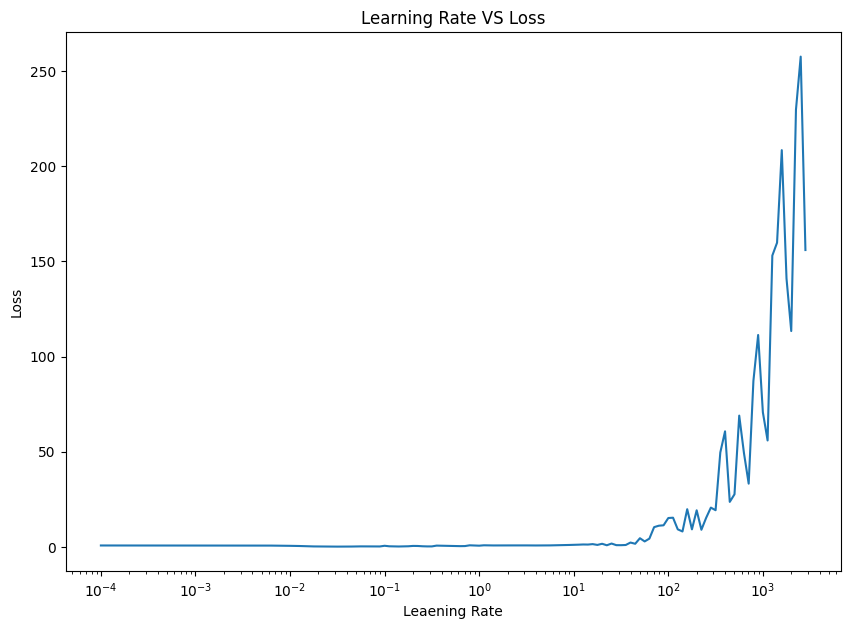

In [52]:
# Plot the learning rate vs the loss
lrs=1e-4*(10**(tf.range(150)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_11.history["loss"])
plt.xlabel("Leaening Rate")
plt.ylabel("Loss")
plt.title("Learning Rate VS Loss")

In [53]:
lrs

<tf.Tensor: shape=(150,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [54]:
len(lrs)

150

In [71]:
# let's try using a higher *idela* learning rate with the saem model

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_12=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])

# Compile the model
model_12.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_12=model_12.fit(X_train,y_train,epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.4686 - loss: 0.6987 
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.5388 - loss: 0.6874
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.5544 - loss: 0.6790
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.6567 - loss: 0.6603
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.6783 - loss: 0.6273
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.7831 - loss: 0.5639
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.8963 - loss: 0.4471
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.9620 - loss: 0.2902
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.9765 - loss: 0.1891
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.9721 - loss: 0.1435
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.9801 - loss: 0.1133
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/ste

<Axes: >

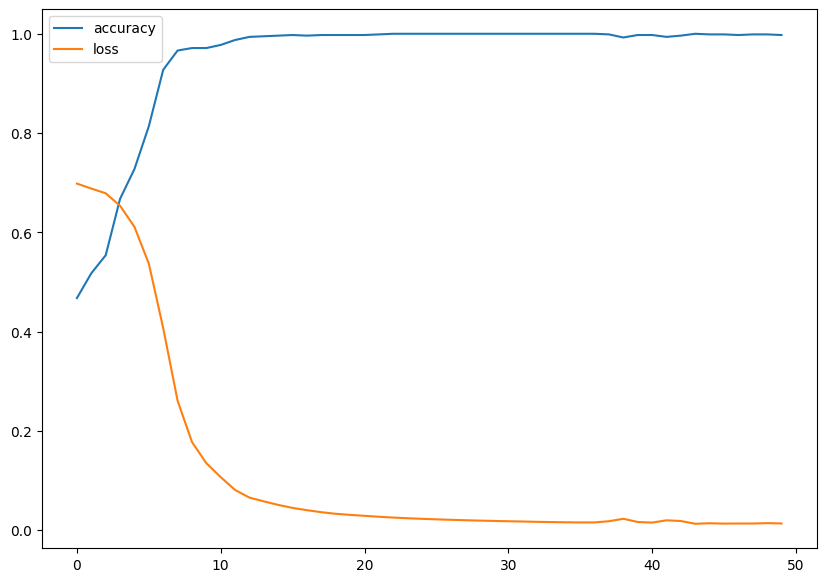

In [72]:
pd.DataFrame(history_12.history).plot(figsize=(10,7))

In [73]:
# Evaluate the model 12 on test data set
model_12.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9973 - loss: 0.0203 


[0.01788795180618763, 0.9950000047683716]

In [74]:
# Evaluate the model 10 on the test data set
model_10.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.9981 - loss: 0.0113


[0.022867649793624878, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step
Doing binary classification


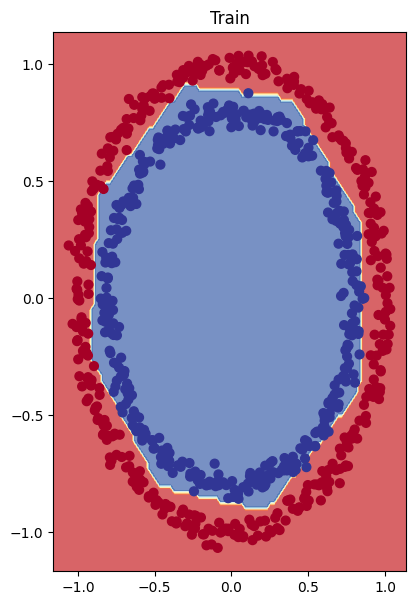

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step
Doing binary classification


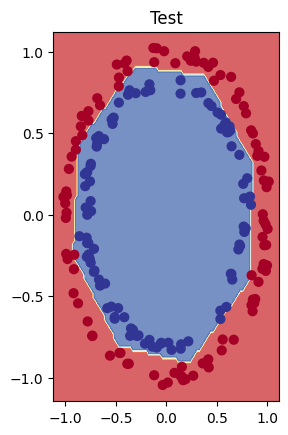

In [79]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_12,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_12,X=X_test,y=y_test)
plt.show()